Mean Squared Error: 4.082628398521854
R-squared: 0.9889832909573145


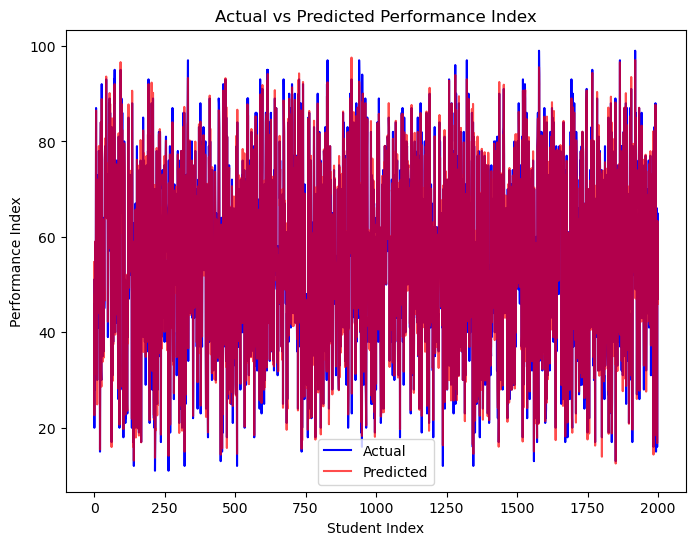

<Figure size 640x480 with 0 Axes>

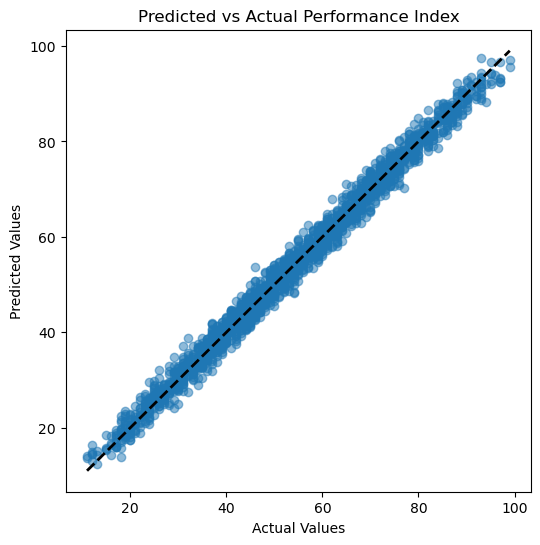

Hours Studied : 2.852483930072587
Previous Scores : 1.0169881989329308
Extracurricular Activities : 0.6086166795764204
Sleep Hours : 0.4769414841762726
Sample Question Papers Practiced : 0.191831441450543


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Student_Performance.csv")

#Change "Yes/No" into numbers (0 or 1) so computer can understand
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"No":0, "Yes":1})

#Features (X) = inputs, Target (y) = output we want to predict
X = df.drop("Performance Index", axis=1) #inputs
y = df["Performance Index"] #output

# 80% data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train (fit) the model with training data
model.fit(X_train, y_train)

# Use trained model to predict on test data
y_pred = model.predict(X_test)

# Mean Squared Error (smaller = better)
mse = mean_squared_error(y_test, y_pred)

# R-squared (closer to 1 = better)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(8,6))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", alpha=0.7)
plt.title("Actual vs Predicted Performance Index")
plt.xlabel("Student Index")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

plt.clf()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Predicted vs Actual Performance Index")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Show how each feature affects Performance Index
for feature, coef in zip(X.columns, model.coef_):
    print(feature, ":", coef)